In [9]:
# Import necessary packages
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
import numpy as np
import json
import cv2


Drawing peg0.peggle
Drawing peg1.peggle
Drawing peg2.peggle
Drawing peg3.peggle
Drawing peg4.peggle
Drawing peg5.peggle


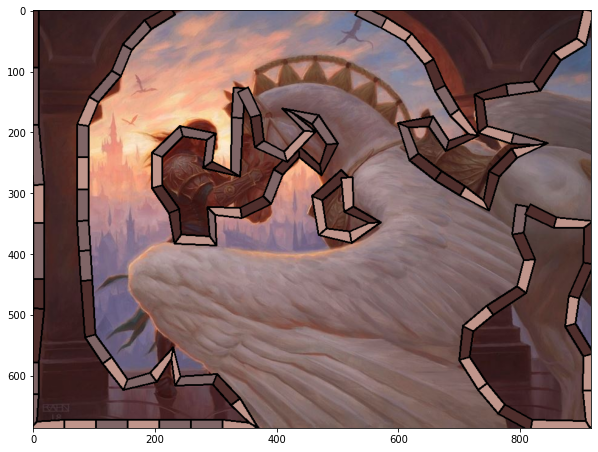

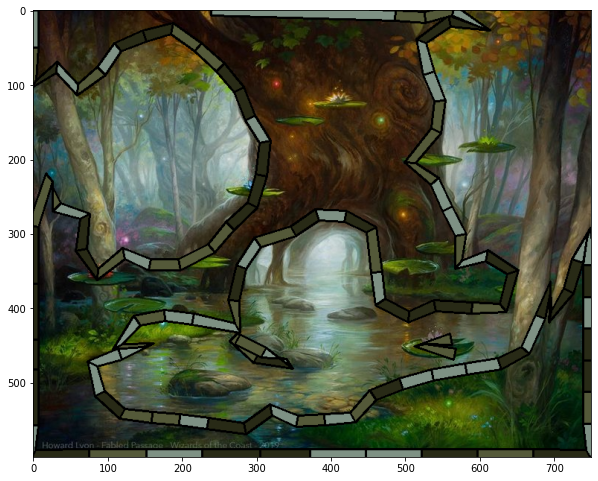

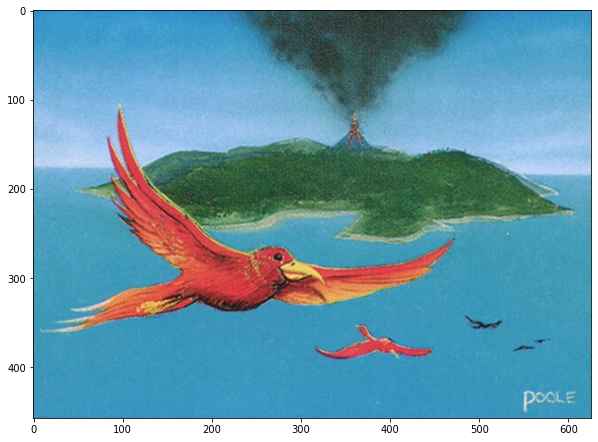

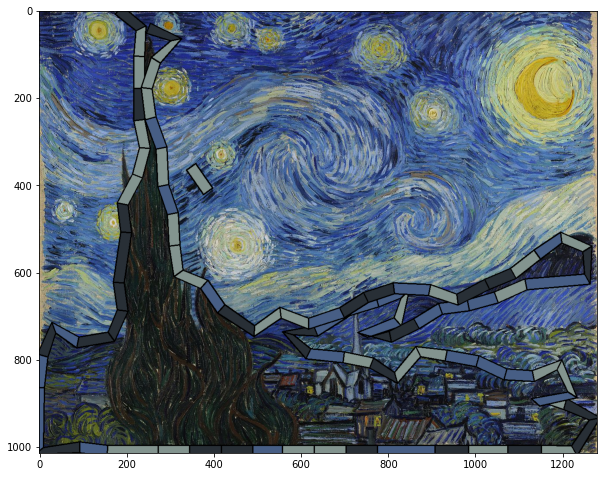

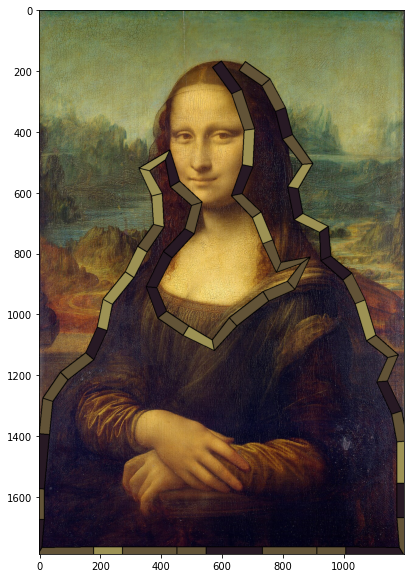

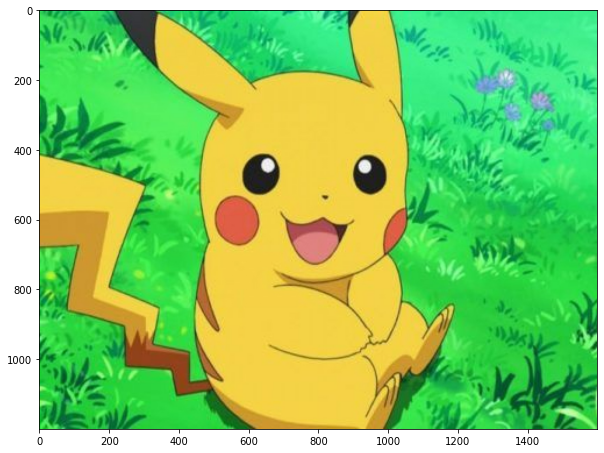

In [56]:
root_peg_width = .01

def draw_level(filename):
  # load json file
  data = json.load(open(filename))

  # data has 3 keys: 'filename', 'pegs', 'palette'
  # fetch image from url filename
  image_url = data['filename']

  # fetch image from url
  urllib.request.urlretrieve(image_url, 'image.jpg')

  # load image
  image = plt.imread('image.jpg')

  width = image.shape[1]
  height = image.shape[0]

  peg_width = root_peg_width * max(width, height)

  for i, peg in enumerate(data['pegs']):
    # choose a random color from the palette
    color = data['palette'][np.random.randint(len(data['palette']))]

    # peg looks like [[[x1,y1],[x2,y2]]]
    # it's normalized to be between 0 and 1 
    # so we need to multiply by width and height
    x1 = int(peg[0][0] * width)
    y1 = int(peg[0][1] * height)
    x2 = int(peg[1][0] * width)
    y2 = int(peg[1][1] * height)

    vector_direction = np.array([x2-x1, y2-y1])
    inverse_vector_direction = np.array([y2-y1, x1-x2])

    # normalize vector direction
    vector_direction = vector_direction / np.linalg.norm(vector_direction)
    inverse_vector_direction = inverse_vector_direction / np.linalg.norm(inverse_vector_direction)

    # we have two inverse directions, one for front, one for back
    front_inverse_vector_direction = inverse_vector_direction
    back_inverse_vector_direction = inverse_vector_direction

    # if the first point is the same as the last peg second point
    if i > 0 and peg[0] == data['pegs'][i-1][1]:
      # then we need to adjust the front inverse vector direction
      prev_x1 = int(data['pegs'][i-1][0][0] * width)
      prev_y1 = int(data['pegs'][i-1][0][1] * height)

      total_vector = np.array([x2-prev_x1, y2-prev_y1])

      inverse_total_vector = np.array([total_vector[1], -total_vector[0]])

      # normalize vector direction
      inverse_total_vector = inverse_total_vector / np.linalg.norm(inverse_total_vector)

      front_inverse_vector_direction = inverse_total_vector

    # if the second point is the same as the next peg first point
    if i < len(data['pegs']) - 1 and peg[1] == data['pegs'][i+1][0]:
      # then we need to adjust the back inverse vector direction
      next_x2 = int(data['pegs'][i+1][1][0] * width)
      next_y2 = int(data['pegs'][i+1][1][1] * height)

      total_vector = np.array([next_x2-x1, next_y2-y1])
      
      inverse_total_vector = np.array([total_vector[1], -total_vector[0]])

      # normalize vector direction
      inverse_total_vector = inverse_total_vector / np.linalg.norm(inverse_total_vector)

      back_inverse_vector_direction = inverse_total_vector


    # we need to draw a filled polygon
    # so we need to find the 4 corners of the polygon
    # and then fill it

    # find the 4 corners of the polygon
    # first corner
    p_x1 = x1 + front_inverse_vector_direction[0] * peg_width
    p_y1 = y1 + front_inverse_vector_direction[1] * peg_width

    # second corner
    p_x2 = x1 - front_inverse_vector_direction[0] * peg_width
    p_y2 = y1 - front_inverse_vector_direction[1] * peg_width

    # third corner
    p_x3 = x2 - back_inverse_vector_direction[0] * peg_width
    p_y3 = y2 - back_inverse_vector_direction[1] * peg_width

    # fourth corner
    p_x4 = x2 + back_inverse_vector_direction[0] * peg_width
    p_y4 = y2 + back_inverse_vector_direction[1] * peg_width

    # draw polygon
    points = np.array([[p_x1,p_y1],[p_x2,p_y2],[p_x3,p_y3],[p_x4,p_y4]], np.int32)

    # draw polygon
    cv2.fillPoly(image, pts =[points], color=color)
    # outline
    cv2.polylines(image, pts =[points], isClosed=True, color=(0,0,0), thickness=2)



  # draw image
  plt.figure(figsize=(10,10))
  plt.imshow(image)

# list all files in the output folder
import os
files = os.listdir('output')

for file in files:
  if file.endswith('.peggle'):
    print('Drawing', file)
    draw_level('output/' + file)
